In [1]:
import mlx.core as mx
import mlx.nn as nn

In [2]:
inputs = mx.array(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)  
)

In [3]:
attn_scores = mx.zeros([inputs.shape[0], inputs.shape[0]])
attn_weights = mx.zeros([inputs.shape[0], inputs.shape[0]])
context_vectors = mx.zeros([inputs.shape[0], inputs.shape[1]])
print(attn_scores.shape)
print(attn_weights.shape)
print(context_vectors.shape)

for i, x in enumerate(inputs):
    # calculate attention scores
    for j, y in enumerate(inputs):
        attn_scores[i, j] = mx.tensordot(x, y, 1)
    # calculate attention weights
    attn_weights[i] = mx.softmax(attn_scores[i])
    # calculate context vectors
    for j, y in enumerate(inputs):
        context_vectors[i] += y * attn_weights[i, j]

print(f"attn_scores: {attn_scores}")
print(f"attn_weights: {attn_weights}")
print(f"context_vectors: {context_vectors}")

(6, 6)
(6, 6)
(6, 3)
attn_scores: array([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.631],
       [0.9544, 1.495, 1.4754, 0.8434, 0.707, 1.0865],
       [0.9422, 1.4754, 1.457, 0.8296, 0.7154, 1.0605],
       [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
       [0.4576, 0.707, 0.7154, 0.3474, 0.6654, 0.2935],
       [0.631, 1.0865, 1.0605, 0.6565, 0.2935, 0.945]], dtype=float32)
attn_weights: array([[0.209835, 0.200581, 0.198149, 0.124228, 0.122049, 0.145158],
       [0.138548, 0.237891, 0.233274, 0.123992, 0.108182, 0.158114],
       [0.139008, 0.236921, 0.232602, 0.124204, 0.1108, 0.156464],
       [0.143527, 0.207394, 0.204552, 0.146192, 0.126295, 0.172039],
       [0.152611, 0.195839, 0.197491, 0.136687, 0.187859, 0.129514],
       [0.138471, 0.218364, 0.212759, 0.142048, 0.0988064, 0.189552]], dtype=float32)
context_vectors: array([[0.442059, 0.593099, 0.578989],
       [0.441866, 0.651482, 0.568309],
       [0.443128, 0.649595, 0.567073],
       [0.43039, 0.629828, 0.551027],


In [4]:
attn_scores = mx.zeros([inputs.shape[0], inputs.shape[0]])
attn_weights = mx.zeros([inputs.shape[0], inputs.shape[0]])
context_vectors = mx.zeros([inputs.shape[0], inputs.shape[1]])
print(attn_scores.shape)
print(attn_weights.shape)
print(context_vectors.shape)

attn_scores = inputs @ inputs.T
attn_weights = mx.softmax(attn_scores, axis=-1)
context_vectors = attn_weights @ inputs

print(f"attn_scores: {attn_scores}")
print(f"attn_weights: {attn_weights}")
print(f"context_vectors: {context_vectors}")

(6, 6)
(6, 6)
(6, 3)
attn_scores: array([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.631],
       [0.9544, 1.495, 1.4754, 0.8434, 0.707, 1.0865],
       [0.9422, 1.4754, 1.457, 0.8296, 0.7154, 1.0605],
       [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
       [0.4576, 0.707, 0.7154, 0.3474, 0.6654, 0.2935],
       [0.631, 1.0865, 1.0605, 0.6565, 0.2935, 0.945]], dtype=float32)
attn_weights: array([[0.209835, 0.200581, 0.198149, 0.124228, 0.122049, 0.145158],
       [0.138548, 0.237891, 0.233274, 0.123992, 0.108182, 0.158114],
       [0.139008, 0.236921, 0.232602, 0.124204, 0.1108, 0.156464],
       [0.143527, 0.207394, 0.204552, 0.146192, 0.126295, 0.172039],
       [0.152611, 0.195839, 0.197491, 0.136687, 0.187859, 0.129514],
       [0.138471, 0.218364, 0.212759, 0.142048, 0.0988064, 0.189552]], dtype=float32)
context_vectors: array([[0.442059, 0.593099, 0.578989],
       [0.441866, 0.651482, 0.568309],
       [0.443128, 0.649595, 0.567073],
       [0.43039, 0.629828, 0.551027],


In [5]:
mx.random.seed(123)

In [6]:
d_in=inputs.shape[1]
d_out=2

In [7]:
W_query = nn.Linear(d_in, d_out, bias=False)
W_key = nn.Linear(d_in, d_out, bias=False)
W_value = nn.Linear(d_in, d_out, bias=False)

print(W_query.weight)
print(W_key.weight)
print(W_value.weight)

array([[-0.543625, -0.357191, -0.369193],
       [0.180697, 0.397937, 0.478428]], dtype=float32)
array([[0.539553, -0.131374, 0.397048],
       [0.491569, -0.49601, -0.050792]], dtype=float32)
array([[0.289075, -0.445376, -0.425039],
       [0.186969, -0.275999, -0.539648]], dtype=float32)


In [8]:
queries = W_query(inputs)
keys = W_key(inputs)
values = W_value(inputs)

print(f"queries: {queries}")
print(f"keys: {keys}")
print(f"values: {values}")

queries: array([[-0.61592, 0.563191],
       [-0.853417, 0.761351],
       [-0.849762, 0.747438],
       [-0.448602, 0.428438],
       [-0.544809, 0.286464],
       [-0.51599, 0.59052]], dtype=float32)
keys: array([[0.565675, 0.0917684],
       [0.444511, -0.194688],
       [0.449988, -0.173921],
       [0.173531, -0.196302],
       [0.422317, 0.249427],
       [0.140255, -0.400165]], dtype=float32)
values: array([[-0.320789, -0.44129],
       [-0.509011, -0.493454],
       [-0.485821, -0.473402],
       [-0.334984, -0.29703],
       [0.06874, 0.0210016],
       [-0.575618, -0.508257]], dtype=float32)


In [9]:
attn_scores = queries @ keys.T
print(f"attn_scores: {attn_scores}")

attn_scores: array([[-0.296727, -0.38343, -0.375107, -0.217436, -0.119639, -0.311755],
       [-0.412889, -0.527579, -0.516443, -0.297549, -0.170512, -0.424362],
       [-0.412098, -0.523246, -0.512378, -0.294183, -0.172439, -0.418282],
       [-0.214446, -0.28282, -0.27638, -0.161949, -0.0825886, -0.234365],
       [-0.281896, -0.297944, -0.29498, -0.150774, -0.15863, -0.191045],
       [-0.237691, -0.344331, -0.334893, -0.20546, -0.0706202, -0.308676]], dtype=float32)


In [10]:
attn_weights = mx.softmax(attn_scores / keys.shape[-1]**0.5, axis=-1)
print(f"attn_weights: {attn_weights}")

attn_weights: array([[0.164823, 0.155022, 0.155936, 0.174328, 0.18681, 0.163081],
       [0.163523, 0.150785, 0.151977, 0.177419, 0.194094, 0.162202],
       [0.163313, 0.150969, 0.152133, 0.177513, 0.193472, 0.1626],
       [0.165796, 0.157971, 0.158692, 0.172066, 0.181998, 0.163477],
       [0.160409, 0.158599, 0.158931, 0.175992, 0.175017, 0.171052],
       [0.167773, 0.155587, 0.156629, 0.17164, 0.188811, 0.15956]], dtype=float32)


In [11]:
mx.sum(attn_weights)

array(6, dtype=float32)

In [12]:
context_vectors = attn_weights @ values
print(f"context_vectors: {context_vectors}")

context_vectors: array([[-0.346966, -0.353796],
       [-0.342498, -0.349576],
       [-0.342904, -0.349891],
       [-0.34992, -0.356615],
       [-0.354782, -0.359824],
       [-0.345472, -0.353074]], dtype=float32)


In [13]:
class SelfAttention_v1(nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        self.d_in = d_in
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=False)
        self.W_key = nn.Linear(d_in, d_out, bias=False)
        self.W_value = nn.Linear(d_in, d_out, bias=False)

    def __call__(self, x):
        queries = self.W_query(x)
        keys = self.W_key(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.T
        attn_weights = mx.softmax(attn_scores / keys.shape[-1] ** 0.5, axis=-1)
        context_vectors = attn_weights @ values
        return context_vectors

In [14]:
mx.random.seed(789)
sav1 = SelfAttention_v1(d_in, d_out)
print(sav1(inputs))

array([[0.0318105, 0.37613],
       [0.0256262, 0.370863],
       [0.0256772, 0.370911],
       [0.0355207, 0.379327],
       [0.0324242, 0.376756],
       [0.0343046, 0.378258]], dtype=float32)


In [15]:
batch = mx.stack((inputs, inputs), 0)
print(batch.shape)

(2, 6, 3)


In [16]:
class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
        super().__init__()
        self.d_in = d_in
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout)

    def __call__(self, x):
        b, num_tokens, d_in = x.shape
        mask = nn.MultiHeadAttention.create_additive_causal_mask(num_tokens)
        queries = self.W_query(x)
        keys = self.W_key(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.transpose(0, 2, 1)
        attn_scores = attn_scores + mask
        attn_weights = mx.softmax(attn_scores / keys.shape[-1] ** 0.5, axis=-1)
        attn_weights = self.dropout(attn_weights)
        context_vectors = attn_weights @ values
        return context_vectors

In [17]:
mx.random.seed(123)
context_size = 6
dropout = 0.0
ca = CausalAttention(d_in,d_out,context_size,dropout)
print(ca(batch))

array([[[-0.320789, -0.44129],
        [-0.411086, -0.466315],
        [-0.435542, -0.468648],
        [-0.409961, -0.423741],
        [-0.309213, -0.329195],
        [-0.345472, -0.353074]],
       [[-0.320789, -0.44129],
        [-0.411086, -0.466315],
        [-0.435542, -0.468648],
        [-0.409961, -0.423741],
        [-0.309213, -0.329195],
        [-0.345472, -0.353074]]], dtype=float32)


In [18]:
class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = [CausalAttention(d_in, d_out, context_length, dropout, qkv_bias)
                      for _ in range(num_heads)]

    def __call__(self, x):
        return mx.concatenate([head(x) for head in self.heads], axis=-1)

In [19]:
mx.random.seed(123)
mha = MultiHeadAttentionWrapper(d_in, d_out, context_size, dropout, 2)
print(mha(batch))

array([[[-0.320789, -0.44129, -0.29132, -0.473982],
        [-0.411086, -0.466315, -0.293595, -0.425057],
        [-0.435542, -0.468648, -0.287361, -0.410947],
        [-0.409961, -0.423741, -0.265774, -0.343301],
        [-0.309213, -0.329195, -0.184421, -0.354609],
        [-0.345472, -0.353074, -0.22734, -0.305751]],
       [[-0.320789, -0.44129, -0.29132, -0.473982],
        [-0.411086, -0.466315, -0.293595, -0.425057],
        [-0.435542, -0.468648, -0.287361, -0.410947],
        [-0.409961, -0.423741, -0.265774, -0.343301],
        [-0.309213, -0.329195, -0.184421, -0.354609],
        [-0.345472, -0.353074, -0.22734, -0.305751]]], dtype=float32)


In [20]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert d_out % num_heads == 0, "d_out must be divisible by num_heads"
        self.d_in = d_in
        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj  = nn.Linear(d_out, d_out)
        self.dropout = nn.Dropout(dropout)

    def __call__(self, x):
        b, num_tokens, d_in = x.shape
        mask = nn.MultiHeadAttention.create_additive_causal_mask(num_tokens)
        
        # W(x):
        # (d_in, d_out) @ (b, num_tokens, d_in) -> (b, num_tokens, d_out)
        # or
        # Wx:
        # (d_in, d_out) @ ((b, num_tokens, d_in) -> (b, d_in, num_tokens))
        # -> (b, d_out, num_tokens) -> (b, num_tokens, d_out)
        #foo = W_query.weight @ x.transpose(0, 2, 1)
        #foo = foo.transpose(0, 2, 1)
        #print(foo)
        queries = self.W_query(x)
        keys = self.W_key(x)
        values = self.W_value(x)

        #print(f"queries before reshape: {queries}")
        #print(f"queries shape before reshape: {queries.shape}")
        # b, num_tokens, d_out -> b, num_tokens, num_heads, head_dim
        queries = queries.reshape(b, num_tokens, self.num_heads, self.head_dim)
        #print(f"queries after reshape: {queries}")
        #print(f"queries shape after reshape: {queries.shape}")
        # b, num_tokens, d_out -> b, num_tokens, num_heads, head_dim
        keys = keys.reshape(b, num_tokens, self.num_heads, self.head_dim)
        # b, num_tokens, d_out -> b, num_tokens, num_heads, head_dim
        values = values.reshape(b, num_tokens, self.num_heads, self.head_dim)
        
        queries = queries.transpose(0, 2, 1, 3) # b, num_heads, num_tokens, head_dim
        keys = keys.transpose(0, 2, 1, 3) # b, num_heads, num_tokens, head_dim
        values = values.transpose(0, 2, 1, 3) # b, num_heads, num_tokens, head_dim

        # (b, num_heads, num_tokens, head_dim) @ (b, num_heads, head_dim, num_tokens)
        # -> (b, num_heads, num_tokens, num_tokens)
        attn_scores = queries @ keys.transpose(0, 1, 3, 2)
        #print(f"attn_scores shape: {attn_scores.shape}")
        # applied to each head
        attn_scores = attn_scores + mask
        # applied to each head
        attn_weights = mx.softmax(attn_scores / keys.shape[-1] ** 0.5, axis=-1)
        #print(f"attn_weights: {attn_weights}")
        #print(f"attn_weights shape: {attn_weights.shape}")
        # applied to each head
        attn_weights = self.dropout(attn_weights)
        # (b, num_heads, num_tokens, num_tokens) @ (b, num_heads, num_tokens, head_dim)
        # -> (b, num_heads, num_tokens, head_dim) -> (b, num_tokens, num_heads, head_dim)
        context_vectors = (attn_weights @ values).transpose(0, 2, 1, 3)
        #print(f"context_vectors shape: {context_vectors.shape}")
        context_vectors = context_vectors.reshape(b, num_tokens, self.d_out)
        #print(f"context_vectors reshape shape: {context_vectors.shape}")
        context_vectors = self.out_proj(context_vectors)
        return context_vectors
        

In [21]:
mx.random.seed(123)
mha = MultiHeadAttention(d_in=3, d_out=2, context_length=context_size, dropout=dropout, num_heads=2)
print(mha(batch))

array([[[0.409174, 0.713412],
        [0.386287, 0.749947],
        [0.377017, 0.775004],
        [0.373301, 0.785103],
        [0.372671, 0.790298],
        [0.38174, 0.792961]],
       [[0.409174, 0.713412],
        [0.386287, 0.749947],
        [0.377017, 0.775004],
        [0.373301, 0.785103],
        [0.372671, 0.790298],
        [0.38174, 0.792961]]], dtype=float32)


In [22]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 1024,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.0,
    "qkv_bias": False,
}

In [23]:
class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(cfg["emb_dim"], cfg["vocab_size"], bias=False)

    def __call__(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(in_idx)
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()

    def __call__(self, x):
        return x

class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()

    def __call__(self, x):
        return x

In [24]:
model = DummyGPTModel(GPT_CONFIG_124M)
print(model)

DummyGPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.0)
  (trf_blocks): Sequential(
    (layers.0): DummyTransformerBlock()
    (layers.1): DummyTransformerBlock()
    (layers.2): DummyTransformerBlock()
    (layers.3): DummyTransformerBlock()
    (layers.4): DummyTransformerBlock()
    (layers.5): DummyTransformerBlock()
    (layers.6): DummyTransformerBlock()
    (layers.7): DummyTransformerBlock()
    (layers.8): DummyTransformerBlock()
    (layers.9): DummyTransformerBlock()
    (layers.10): DummyTransformerBlock()
    (layers.11): DummyTransformerBlock()
  )
  (final_norm): DummyLayerNorm()
  (out_head): Linear(input_dims=768, output_dims=50257, bias=False)
)


In [25]:
import tiktoken

tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"

batch.append(mx.array(tokenizer.encode(txt1)))
batch.append(mx.array(tokenizer.encode(txt2)))
batch = mx.stack(batch, 0)
print(batch)

array([[6109, 3626, 6100, 345],
       [6109, 1110, 6622, 257]], dtype=int32)


In [26]:
mx.random.seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print("Outputs shape:", logits.shape)
print(logits)

Outputs shape: (2, 4, 50257)
array([[[0.0267821, 0.0155803, 0.0453118, ..., -0.0255345, -0.00809556, 0.00276685],
        [-0.0111713, 0.000690083, 0.00707004, ..., 0.049819, -0.015654, 0.0250585],
        [0.0376061, 0.000597336, 0.0115421, ..., 0.0217559, 0.00157742, 0.0142852],
        [-0.0245741, -0.00587755, -0.0392182, ..., 0.0260377, 0.0335556, -0.0157044]],
       [[0.0267821, 0.0155803, 0.0453118, ..., -0.0255345, -0.00809556, 0.00276685],
        [-0.0079119, 0.0182537, 0.015258, ..., -0.0132906, -0.0449415, 0.00437768],
        [0.0288839, -0.0181241, -0.00847724, ..., -0.0113709, 0.0126249, -0.00459235],
        [-0.0185885, -0.0469349, 0.00496355, ..., 0.00933472, -0.0203806, 0.0187356]]], dtype=float32)


In [27]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = mx.ones((1, emb_dim)) # need to figure out how to make trainable parameter
        self.shift = mx.zeros((1, emb_dim)) # need to figure out how to make trainable parameter

    def __call__(self, x):
        mean = x.mean(axis=-1, keepdims=True)
        var = x.var(axis=-1, keepdims=True)
        norm_x = (x - mean) / mx.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

In [28]:
batch_example = mx.random.normal([2, 5])
ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)
mean = out_ln.mean(axis=-1, keepdims=True)
var = out_ln.var(axis=-1, keepdims=True)
print(mean)
print(var)

array([[-1.19209e-08],
       [-3.57628e-08]], dtype=float32)
array([[0.999989],
       [0.999989]], dtype=float32)


In [29]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def __call__(self, x):
        return 0.5 * x * (1 + mx.tanh(
            mx.sqrt(mx.array(2.0 / mx.pi)) *
            (x + 0.044715 * mx.power(x, 3))
        ))

In [30]:
gelu = GELU()
gelu(1)

array(0.841192, dtype=float32)

In [31]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"])
        )

    def __call__(self, x):
        return self.layers(x)

In [32]:
ffn = FeedForward(GPT_CONFIG_124M)
x = mx.random.normal([2, 3, 768])
out = ffn(x)
print(out)

array([[[-0.0544744, 0.0381818, 0.100466, ..., -0.0528314, 0.397373, -0.0204547],
        [0.00997397, -0.144488, -0.184294, ..., -0.392208, 0.202146, 0.156895],
        [0.0389329, 0.0107757, 0.216761, ..., -0.179308, -0.224197, -0.0595259]],
       [[-0.195685, -0.289583, 0.171215, ..., 0.208507, 0.0598475, 0.117642],
        [-0.00110584, 0.0251188, 0.00942689, ..., 0.0129131, -0.0736913, 0.143136],
        [0.0868328, 0.283533, 0.109481, ..., 0.126102, 0.0610082, -0.05509]]], dtype=float32)


In [33]:
class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_resid = nn.Dropout(cfg["drop_rate"])

    def __call__(self, x):
        shortcut = x
        x = self.norm1(x)
        x = self.att(x)
        x = self.drop_resid(x)
        x = x + shortcut

        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_resid(x)
        x = x + shortcut
        return x

In [34]:
mx.random.seed(123)
x = mx.random.normal([2, 4, 768])
block = TransformerBlock(GPT_CONFIG_124M)
output = block(x)
 
print("Input shape:", x.shape)
print("Output shape:", output.shape)

Input shape: (2, 4, 768)
Output shape: (2, 4, 768)


In [35]:
print(output)

array([[[-0.0782003, 0.987442, -0.94922, ..., 0.229853, -0.141867, -0.0107715],
        [1.01852, 1.36634, 0.335559, ..., -0.409853, -0.265894, 1.22219],
        [-1.2842, -0.0756759, -0.0471307, ..., -0.331826, 0.380631, 0.966117],
        [-0.271844, -0.407028, 0.713517, ..., -0.857271, -1.33917, -1.52331]],
       [[-1.36221, 2.13323, -0.0549182, ..., -0.124698, -0.573453, 0.370974],
        [-0.977188, 0.941463, -1.4587, ..., -0.751929, 0.145659, -1.06629],
        [-0.417758, -0.636303, -0.488185, ..., 0.147002, 0.342525, -0.617717],
        [0.230238, -0.789932, 1.51675, ..., 0.74364, 0.210596, -1.63052]]], dtype=float32)


In [36]:
class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        
        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(cfg["emb_dim"], cfg["vocab_size"], bias=False)

    def __call__(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(mx.arange(seq_len))
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

In [37]:
mx.random.seed(123)
model = GPTModel(GPT_CONFIG_124M)
 
out = model(batch)
print("Input batch:\n", batch)
print("\nOutput shape:", out.shape)
print(out)

Input batch:
 array([[6109, 3626, 6100, 345],
       [6109, 1110, 6622, 257]], dtype=int32)

Output shape: (2, 4, 50257)
array([[[-0.294867, 0.121118, -0.106109, ..., 0.328127, 0.382442, -0.200526],
        [0.00421821, -0.0701152, -0.0358834, ..., -0.215521, 0.312019, -0.64688],
        [-0.184812, -0.0243292, -0.129321, ..., -0.0671608, 0.421177, -0.480935],
        [-0.423911, -0.150163, -0.359892, ..., 0.0569235, 0.144322, -0.833008]],
       [[-0.294867, 0.121118, -0.106109, ..., 0.328127, 0.382442, -0.200526],
        [-0.0484023, -0.301322, -0.0913256, ..., 0.13583, 0.371111, -0.635227],
        [-0.205792, -0.286355, -0.177945, ..., 0.400727, 0.694369, -0.803182],
        [-0.0800309, -0.236314, -0.479477, ..., 0.254939, 0.8567, -1.07093]]], dtype=float32)


In [38]:
print("Token embedding layer shape:", model.tok_emb.weight.shape)
print("Output layer shape:", model.out_head.weight.shape)

Token embedding layer shape: (50257, 768)
Output layer shape: (50257, 768)


In [39]:
def generate_text_simple(model, idx, max_new_tokens, context_size):
    for _ in range(max_new_tokens):
        idx_cond = idx[:, -context_size:]
        logits = model(idx_cond)
       
        logits = logits[:, -1, :]
        probas = mx.softmax(logits, axis=-1)
        idx_next = mx.argmax(probas, axis=-1, keepdims=True)
        idx = mx.concatenate((idx, idx_next), axis=1)
 
    return idx

In [40]:
start_context = "Hello, I am"
encoded = tokenizer.encode(start_context)
print("encoded:", encoded)
encoded_tensor = mx.expand_dims(mx.array(encoded), 0)
print("encoded_tensor.shape:", encoded_tensor.shape)

encoded: [15496, 11, 314, 716]
encoded_tensor.shape: (1, 4)


In [41]:
model.eval()
out = generate_text_simple(
    model=model,
    idx=encoded_tensor, 
    max_new_tokens=6, 
    context_size=GPT_CONFIG_124M["context_length"]
)
print("Output:", out)
print("Output length:", len(out[0]))

Output: array([[15496, 11, 314, ..., 7646, 7646, 29160]], dtype=int64)
Output length: 10


In [42]:
decoded_text = tokenizer.decode(out.squeeze(0).tolist())
print(decoded_text)

Hello, I am strict strict strict strict strictwagen


In [43]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 256,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12, 
    "drop_rate": 0.1,
    "qkv_bias": False
}
mx.random.seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.09999999999999998)
  (trf_blocks): Sequential(
    (layers.0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(input_dims=768, output_dims=768, bias=False)
        (W_key): Linear(input_dims=768, output_dims=768, bias=False)
        (W_value): Linear(input_dims=768, output_dims=768, bias=False)
        (out_proj): Linear(input_dims=768, output_dims=768, bias=True)
        (dropout): Dropout(p=0.09999999999999998)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (layers.0): Linear(input_dims=768, output_dims=3072, bias=True)
          (layers.1): GELU()
          (layers.2): Linear(input_dims=3072, output_dims=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_resid): Dropout(p=0.09999999999999998)
    )
    (layers.1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_que

In [44]:
def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    encoded_tensor = mx.expand_dims(mx.array(encoded), 0) # add batch dimension
    return encoded_tensor
 
def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0) # remove batch dimension
    return tokenizer.decode(flat.tolist())
 
start_context = "Every effort moves you"
tokenizer = tiktoken.get_encoding("gpt2")
 
token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(start_context, tokenizer),
    max_new_tokens=10,
    context_size=GPT_CONFIG_124M["context_length"]
)
print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you DMVSK DMVieversseparSKseparseparseparsepar


In [45]:
file_path = "shakespeare.txt"
with open(file_path, "r", encoding="utf-8") as file:
    text_data = file.read()

In [46]:
total_characters = len(text_data)
total_tokens = len(tokenizer.encode(text_data))
print("Characters:", total_characters)
print("Tokens:", total_tokens)

Characters: 94275
Tokens: 25284


In [47]:
train_ratio = 0.90
split_idx = int(train_ratio * len(text_data))
train_data = text_data[:split_idx]
val_data = text_data[split_idx:]

In [48]:
import torch
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt)

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]


def create_dataloader_v1(txt, batch_size=4, max_length=256,
                         stride=128, shuffle=True, drop_last=True, num_workers=0):
    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last, num_workers=0)

    return dataloader

In [49]:
torch.manual_seed(123)
 
train_loader = create_dataloader_v1(
    train_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=True,
    shuffle=False
)
val_loader = create_dataloader_v1(
    val_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=False,
    shuffle=False
)

In [50]:
print("Train loader:")
for x, y in train_loader:
    print(x.shape, y.shape)
 
print("\nValidation loader:")
for x, y in val_loader:
    print(x.shape, y.shape)

samples = next(iter(train_loader))
sample = samples[0][0]
text = tokenizer.decode(sample.tolist())
print(text)

Train loader:
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256])

In [51]:
import numpy as np

def calc_loss_batch(model, input_batch, target_batch):
    input_batch, target_batch = input_batch, target_batch
    logits = model(input_batch)
    mlx_logits = logits.flatten(0, 1)
    mlx_target_batch = target_batch.flatten()
    #print("mlx_logits shape:", mlx_logits.shape)
    #print("mlx_target_batch shape:", mlx_target_batch.shape)
    mlx_loss = nn.losses.cross_entropy(
        mlx_logits, mlx_target_batch, reduction='mean'
    )
    pytorch_logits = torch.tensor(np.array(logits)).flatten(0, 1)
    pytorch_target_batch = torch.tensor(np.array(target_batch)).flatten()
    #print("pytorch_logits shape:", pytorch_logits.shape)
    #print("pytorch_target_batch shape:", pytorch_target_batch.shape)
    pytorch_loss = torch.nn.CrossEntropyLoss()
    pytorch_loss_output = pytorch_loss(pytorch_logits, pytorch_target_batch)
    #print("mlx_loss:", mlx_loss)
    #print("pytorch_loss:", pytorch_loss_output)
    return mlx_loss

In [52]:
def calc_loss_loader(data_loader, model, num_batches=None):
    total_loss = 0.
    if num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(model, mx.array(input_batch.numpy()), mx.array(target_batch.numpy()))
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches

In [53]:
calc_loss_batch(model, mx.array(samples[0].numpy()), mx.array(samples[1].numpy()))

array(11.0006, dtype=float32)

In [54]:
train_loss = calc_loss_loader(train_loader, model)
val_loss = calc_loss_loader(val_loader, model)
print("Training loss:", train_loss)
print("Validation loss:", val_loss)

Training loss: 10.960246714678677
Validation loss: 10.9336727142334


In [55]:
def train_model_simple(model, train_loader, val_loader, optimizer, num_epochs,
                       eval_freq, eval_iter, start_context):
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step = 0, -1

    loss_and_grad_fn = nn.value_and_grad(model, calc_loss_batch)
    
    for epoch in range(num_epochs):
        for input_batch, target_batch in train_loader:
            input_batch = mx.array(input_batch.numpy())
            target_batch = mx.array(target_batch.numpy())
            loss, grads = loss_and_grad_fn(model, input_batch, target_batch)
            optimizer.update(model, grads)
            mx.eval(model.parameters(), optimizer.state)
            
            tokens_seen += input_batch.size
            global_step += 1
 
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")
 
        generate_and_print_sample(
            model, tokenizer, start_context
        )
    return train_losses, val_losses, track_tokens_seen

In [56]:
def evaluate_model(model, train_loader, val_loader, eval_iter):
    model.eval()
    train_loss = calc_loss_loader(train_loader, model, num_batches=eval_iter)
    val_loss = calc_loss_loader(val_loader, model, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss

In [57]:
def generate_and_print_sample(model, tokenizer, start_context):
    model.eval()
    context_size = model.pos_emb.weight.shape[0]
    encoded = text_to_token_ids(start_context, tokenizer)
    token_ids = generate_text_simple(
        model=model, idx=encoded,
        max_new_tokens=50, context_size=context_size
    )
    decoded_text = token_ids_to_text(token_ids, tokenizer)
    print(decoded_text.replace("\n", " "))  # Compact print format
    model.train()

In [58]:
import mlx.optimizers as optim

print(GPT_CONFIG_124M)
mx.random.seed(123)
model = GPTModel(GPT_CONFIG_124M)
mx.eval(model.parameters())
optimizer = optim.AdamW(learning_rate=optim.linear_schedule(0.0, 0.0002, 50), weight_decay=0.1)
num_epochs = 10
train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer,
    num_epochs=num_epochs, eval_freq=5, eval_iter=1,
    start_context="Every effort moves you"
)

{'vocab_size': 50257, 'context_length': 256, 'emb_dim': 768, 'n_heads': 12, 'n_layers': 12, 'drop_rate': 0.1, 'qkv_bias': False}
Ep 1 (Step 000000): Train loss 11.001, Val loss 10.875
Ep 1 (Step 000005): Train loss 9.248, Val loss 9.246
Ep 1 (Step 000010): Train loss 8.535, Val loss 8.577
Ep 1 (Step 000015): Train loss 7.472, Val loss 7.611
Ep 1 (Step 000020): Train loss 6.588, Val loss 6.897
Ep 1 (Step 000025): Train loss 6.357, Val loss 6.791
Ep 1 (Step 000030): Train loss 6.366, Val loss 6.789
Ep 1 (Step 000035): Train loss 6.232, Val loss 6.627
Ep 1 (Step 000040): Train loss 6.295, Val loss 6.530
Every effort moves you,  , , , , , , , , , , , , , , , , , , , , , , , ,
Ep 2 (Step 000045): Train loss 6.058, Val loss 6.399
Ep 2 (Step 000050): Train loss 5.781, Val loss 6.481
Ep 2 (Step 000055): Train loss 5.856, Val loss 6.458
Ep 2 (Step 000060): Train loss 6.102, Val loss 6.459
Ep 2 (Step 000065): Train loss 6.181, Val loss 6.501
Ep 2 (Step 000070): Train loss 6.229, Val loss 6.541
E

In [59]:
from mlx.utils import tree_flatten
num_params = sum(v.size for _, v in tree_flatten(model.parameters()))
print(num_params)

162419712


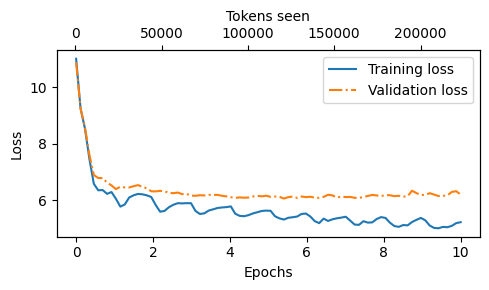

In [60]:
import matplotlib.pyplot as plt
def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    fig, ax1 = plt.subplots(figsize=(5, 3))
    ax1.plot(epochs_seen, train_losses, label="Training loss")
    ax1.plot(epochs_seen, val_losses, linestyle="-.", label="Validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax2 = ax1.twiny()
    ax2.plot(tokens_seen, train_losses, alpha=0)
    ax2.set_xlabel("Tokens seen")
    fig.tight_layout()
    plt.show()
 
epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)